In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "0"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

11it [00:00, 106.68it/s]

27it [00:00, 117.85it/s]

43it [00:00, 127.37it/s]

59it [00:00, 134.14it/s]

74it [00:00, 135.37it/s]

90it [00:00, 140.16it/s]

106it [00:00, 143.16it/s]

122it [00:00, 146.50it/s]

137it [00:00, 145.35it/s]

152it [00:01, 146.25it/s]

167it [00:01, 144.00it/s]

182it [00:01, 144.34it/s]

197it [00:01, 134.45it/s]

213it [00:01, 139.99it/s]

229it [00:01, 144.34it/s]

245it [00:01, 147.64it/s]

261it [00:01, 149.52it/s]

277it [00:01, 150.98it/s]

293it [00:02, 151.66it/s]

309it [00:02, 152.00it/s]

325it [00:02, 153.40it/s]

341it [00:02, 154.03it/s]

357it [00:02, 144.36it/s]

373it [00:02, 146.75it/s]

389it [00:02, 148.95it/s]

404it [00:02, 148.39it/s]

419it [00:02, 117.62it/s]

432it [00:03, 114.04it/s]

445it [00:03, 116.07it/s]

461it [00:03, 125.64it/s]

478it [00:03, 134.73it/s]

494it [00:03, 141.11it/s]

509it [00:03, 138.78it/s]

525it [00:03, 142.61it/s]

541it [00:03, 146.23it/s]

557it [00:03, 149.13it/s]

573it [00:04, 151.59it/s]

589it [00:04, 153.04it/s]

605it [00:04, 153.90it/s]

621it [00:04, 149.06it/s]

636it [00:04, 145.56it/s]

651it [00:04, 137.77it/s]

667it [00:04, 142.16it/s]

683it [00:04, 144.99it/s]

699it [00:04, 147.11it/s]

714it [00:04, 146.95it/s]

730it [00:05, 147.48it/s]

745it [00:05, 147.48it/s]

760it [00:05, 144.86it/s]

776it [00:05, 146.87it/s]

792it [00:05, 149.57it/s]

808it [00:05, 151.30it/s]

824it [00:05, 152.76it/s]

840it [00:05, 154.61it/s]

857it [00:05, 156.42it/s]

873it [00:06, 155.94it/s]

889it [00:06, 138.92it/s]

905it [00:06, 143.87it/s]

922it [00:06, 148.83it/s]

938it [00:06, 149.50it/s]

955it [00:06, 153.84it/s]

971it [00:06, 127.43it/s]

985it [00:06, 112.83it/s]

998it [00:07, 104.22it/s]

1010it [00:07, 99.13it/s]

1021it [00:07, 96.03it/s]

1032it [00:07, 92.66it/s]

1042it [00:07, 94.25it/s]

1057it [00:07, 105.97it/s]

1069it [00:07, 105.67it/s]

1081it [00:07, 103.13it/s]

1093it [00:07, 105.58it/s]

1104it [00:08, 101.92it/s]

1115it [00:08, 101.87it/s]

1126it [00:08, 101.58it/s]

1137it [00:08, 101.26it/s]

1150it [00:08, 106.86it/s]

1166it [00:08, 118.53it/s]

1184it [00:08, 130.72it/s]

1200it [00:08, 137.81it/s]

1216it [00:08, 143.49it/s]

1232it [00:09, 148.02it/s]

1248it [00:09, 151.04it/s]

1266it [00:09, 156.19it/s]

1283it [00:09, 157.89it/s]

1299it [00:09, 152.77it/s]

1315it [00:09, 154.53it/s]

1332it [00:09, 157.78it/s]

1348it [00:09, 157.78it/s]

1364it [00:09, 156.26it/s]

1380it [00:09, 155.00it/s]

1396it [00:10, 138.58it/s]

1411it [00:10, 114.21it/s]

1424it [00:10, 115.30it/s]

1441it [00:10, 126.32it/s]

1455it [00:10, 121.68it/s]

1472it [00:10, 132.58it/s]

1488it [00:10, 139.16it/s]

1504it [00:10, 144.63it/s]

1521it [00:11, 148.66it/s]

1537it [00:11, 130.73it/s]

1551it [00:11, 122.66it/s]

1562it [00:11, 136.74it/s]


0it [00:00, ?it/s]

17it [00:00, 169.32it/s]

Number of empty sat catalogs is 82


34it [00:00, 166.32it/s]

51it [00:00, 164.87it/s]

67it [00:00, 162.52it/s]

80it [00:00, 138.90it/s]

95it [00:00, 140.32it/s]

112it [00:00, 146.48it/s]

129it [00:00, 151.33it/s]

145it [00:00, 153.83it/s]

160it [00:01, 146.43it/s]

177it [00:01, 150.63it/s]

194it [00:01, 154.19it/s]

210it [00:01, 152.32it/s]

226it [00:01, 138.24it/s]

241it [00:01, 134.72it/s]

258it [00:01, 142.32it/s]

275it [00:01, 147.64it/s]

292it [00:01, 151.65it/s]

309it [00:02, 156.26it/s]

325it [00:02, 150.65it/s]

342it [00:02, 155.82it/s]

360it [00:02, 160.60it/s]

377it [00:02, 162.58it/s]

395it [00:02, 164.64it/s]

412it [00:02, 165.08it/s]

429it [00:02, 165.28it/s]

446it [00:02, 165.94it/s]

463it [00:02, 166.48it/s]

481it [00:03, 167.69it/s]

498it [00:03, 166.95it/s]

515it [00:03, 166.02it/s]

532it [00:03, 165.29it/s]

549it [00:03, 164.61it/s]

566it [00:03, 126.30it/s]

581it [00:03, 130.80it/s]

597it [00:03, 136.84it/s]

614it [00:04, 144.85it/s]

632it [00:04, 151.72it/s]

649it [00:04, 156.12it/s]

666it [00:04, 157.55it/s]

683it [00:04, 147.87it/s]

700it [00:04, 152.80it/s]

716it [00:04, 149.26it/s]

732it [00:04, 149.84it/s]

749it [00:04, 154.85it/s]

766it [00:05, 157.43it/s]

783it [00:05, 159.23it/s]

800it [00:05, 159.54it/s]

817it [00:05, 162.18it/s]

834it [00:05, 162.80it/s]

851it [00:05, 163.53it/s]

868it [00:05, 159.19it/s]

884it [00:05, 154.41it/s]

900it [00:05, 155.07it/s]

916it [00:05, 136.48it/s]

931it [00:06, 118.71it/s]

944it [00:06, 114.76it/s]

957it [00:06, 111.82it/s]

969it [00:06, 111.33it/s]

984it [00:06, 120.64it/s]

998it [00:06, 124.45it/s]

1015it [00:06, 133.80it/s]

1032it [00:06, 141.47it/s]

1049it [00:07, 147.32it/s]

1066it [00:07, 153.07it/s]

1083it [00:07, 157.76it/s]

1100it [00:07, 156.24it/s]

1117it [00:07, 159.45it/s]

1134it [00:07, 161.26it/s]

1151it [00:07, 162.09it/s]

1168it [00:07, 161.81it/s]

1185it [00:07, 164.02it/s]

1202it [00:07, 162.64it/s]

1219it [00:08, 162.08it/s]

1236it [00:08, 161.69it/s]

1253it [00:08, 161.87it/s]

1270it [00:08, 134.44it/s]

1285it [00:08, 124.43it/s]

1299it [00:08, 128.28it/s]

1316it [00:08, 138.26it/s]

1333it [00:08, 145.63it/s]

1349it [00:09, 145.94it/s]

1366it [00:09, 150.00it/s]

1383it [00:09, 153.70it/s]

1400it [00:09, 157.68it/s]

1416it [00:09, 149.66it/s]

1433it [00:09, 154.22it/s]

1449it [00:09, 135.71it/s]

1464it [00:09, 139.45it/s]

1480it [00:09, 144.31it/s]

1498it [00:10, 151.81it/s]

1515it [00:10, 155.89it/s]

1533it [00:10, 160.32it/s]

1551it [00:10, 164.67it/s]

1562it [00:10, 150.60it/s]

Number of empty sat catalogs is 82


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

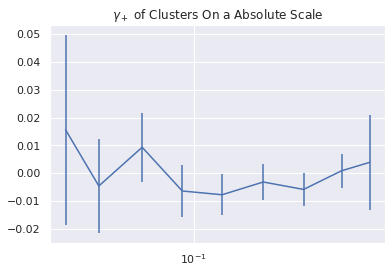

Aggregated xi:
[ 0.     -1.2044  1.0624 -3.4712  4.1166  8.8293  4.76   10.6973 -1.5104
 -0.6777]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -292.0974  -796.9886 -1076.6253 -1580.0943 -2263.8104
 -2279.9216 -1894.3015  -962.8399   -43.0169]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   77.  234.  371.  649. 1148. 1527. 1851. 1655.  171.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0156  0.0045 -0.0094  0.0063  0.0077  0.0031  0.0058 -0.0009
 -0.004 ]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7935 -3.4059 -2.902  -2.4347 -1.972  -1.4931 -1.0234 -0.5818
 -0.2516]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

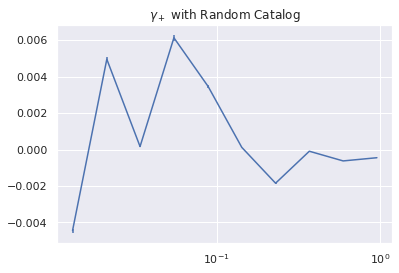

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1248e-04 -1.2544e-04 -4.2044e-06 -1.5522e-04 -8.7664e-05 -3.0678e-06
  4.6712e-05  2.3242e-06  1.5775e-05  1.1326e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

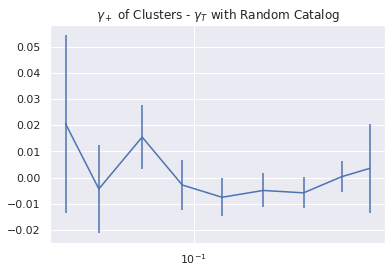

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

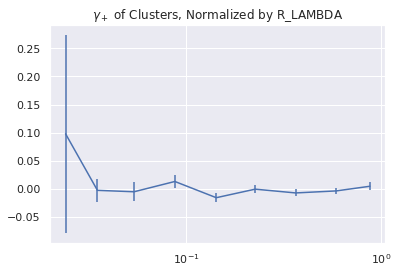

Aggregated xi:
[ 0.     -0.6865  0.3951  1.251  -6.1625 13.2035  0.555  12.1054  6.9324
 -4.9915]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -26.0547  -518.6398  -719.8722 -1133.7506 -1645.1391
 -1889.9527 -1708.2625 -1032.3125  -140.1697]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    7.  155.  247.  466.  846. 1272. 1694. 1941. 1055.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0981  0.0025  0.0051 -0.0132  0.0156  0.0004  0.0071  0.0036
 -0.0047]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7221 -3.3461 -2.9145 -2.4329 -1.9446 -1.4858 -1.0084 -0.5318
 -0.1329]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)